# Genelized Linear Models
The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation, if  is the predicted value.

$\hat{y} = w_0 + w_1 x_1 + \dots + w_p x_y$

In least squares we minimize 

$\min_{w } || Xw - y||^2$



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
np.random.seed(100)

In [1]:
#help(sklearn.model_selection.StratifiedShuffleSplit)

In [3]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes)



{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [4]:
print(diabetes.DESCR)
print()
print(diabetes.feature_names)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [5]:
diabetes['data'].shape

(442, 10)

In [6]:
# Use only one feature
diabetes_X = diabetes.data[:, None, 2]# diabetes.data[:, np.newaxis, 2] # np.newaxis is used to choose one feature
diabetes_X.shape

(442, 1)

Coefficients: 
 [936.14942795]
Mean squared error: 3729.34
Variance score: 0.34


C:\Users\gilbe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


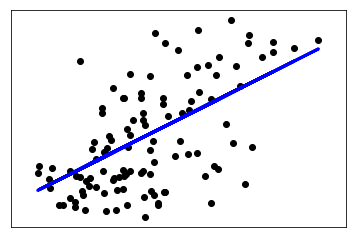

In [7]:
# Split the data into training/testing sets
(diabetes_X_train, diabetes_X_test,
 diabetes_y_train, diabetes_y_test) = train_test_split(diabetes_X, diabetes.target, train_size=0.75, shuffle=True)

# Create linear regression object
regr = linear_model.LinearRegression() # svm.SVR()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Ridge Regression
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

$\min_{w}|| Xw - y||^2 + \alpha || w||^2 $

where $\alpha > 0$

Coefficients: 
 [565.97376223]
Mean squared error: 4121.37
Variance score: 0.27


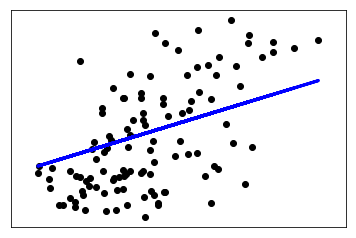

In [8]:
ridge_reg = linear_model.Ridge(alpha=0.5)
ridge_reg.fit(diabetes_X_train, diabetes_y_train)


# Make predictions using the testing set
diabetes_y_pred = ridge_reg.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', ridge_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Lasso

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero coefficients (see Compressive sensing: tomography reconstruction with L1 prior (Lasso)).

Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

$ \min_{w} \frac{1}{2 n_{samples}}|| Xw - y||^2 + \alpha || w|| $

Coefficients: 
 [892.85125636]
Mean squared error: 3744.89
Variance score: 0.34


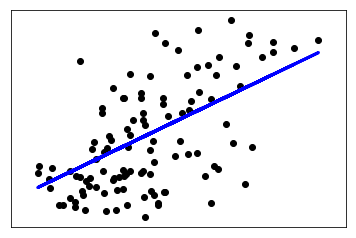

In [9]:
lasso_reg = linear_model.Lasso(alpha=0.1)

lasso_reg.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = lasso_reg.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', lasso_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

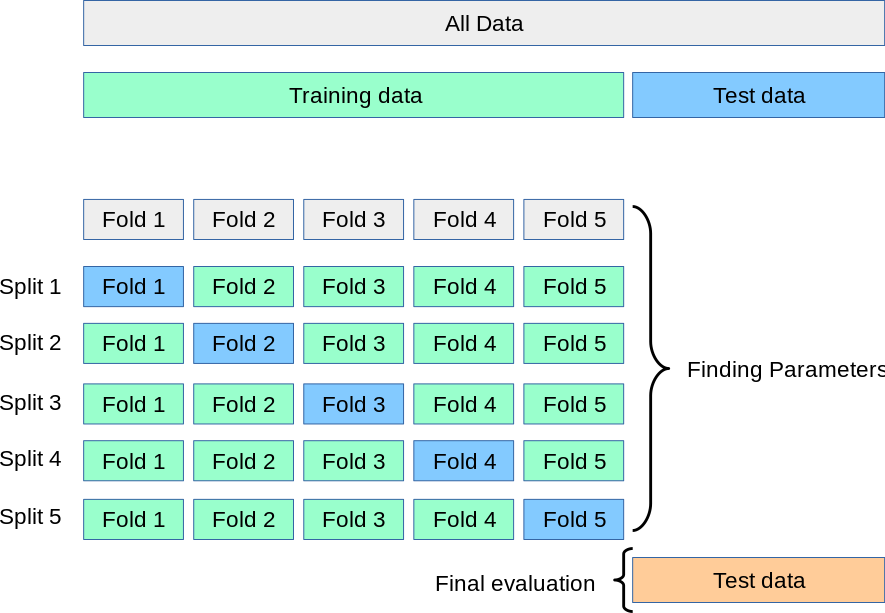

In [10]:
from IPython.display import Image
Image(filename="grid_search_cross_validation.png")